# Projeto 3 - MC886 Aprendizado de Máquina

Victor Prado Palmerini - 178061

Erik Soares - 155261

## Introdução

Este é o Projeto 2 da disciplina MC886 - Aprendizado de Máquina - 1S2021

Este trabalho é dividido em 2 partes que consistem em diferentes abordagens para resolver de obter o melhor modelo do jogo PacMan para jogar sozinho e atingir a vitória com o maior score possível. Na 1ª parte o modelo é treinado utilizando **Programação Genética**. E na 2ª parte o modelo utiliza **Aprendizado por Reforço**.

O jogo utilizado é uma implementação obtida por este [link](http://cs.brynmawr.edu/Courses/cs372/fall2017/Code/search.zip)

## Descrição Geral

O projeto se baseia neste notebook e em 2 scripts em **Python 2** (`genetic.py` e `reinforcement.py`) que executam junto com o projeto do jogo e são chamados por este notebook. Além disso, há outras implementações complementares que serão citadas ao longo do relatório.

## Parte 1 - Programação Genética

Nesta parte nos preocupamos em implementar os principais conceitos relacionados à Programação Genética, como a ideia de evolução de indivíduos e gerações, crossover, mutação, entre outros. Existem vários layouts disponíveis mas neste projeto focaremos em 3: `smallClassic`, `mediumClassic` e `originalClassic`.

### Desenvolvimento

A ideia geral do nosso algoritmo de programação genética é ter a 1ª geração de PacMans com movimentos totalmente aleatórios. Os possíveis movimentos de um indivíduo são: `Stop`, `North`, `East`, `West` e `South`. Claro que isso vai depender também da posição atual do indivíduo, mas em geral esses são os movimentos válidos.

A partir da 2ª geração a ideia é que os indivíduos herdem movimentos da geração anterior e que são alterados pro crossover e mutação.

Todos os movimentos de cada indivíduo de cada geração são armazenados em arquivos que são criados em tempo de execução do jogo. Isso é útil pois assim conseguimos dar replay no jogo de qualquer indíviduo após a sua execução.

De acordo com o código do projeto base, é possível criar agents que implementam alguma funcionalidade específica para cada caso de uso. No nosso caso, queremos um agent que se movimenta aleatoriamente (1ª geração) e um agent que carregue a sua sequência de  movimentos a partir de um arquivo e siga tais movimentos no jogo (outras gerações). O agent que se movimenta aleatoriamente está implementado no arquivo `randomAgents.py` e o agent que carrega um caminho está implementado no arquivo `geneticAgents.py`. No caso do 2° agent, caso ele esgote os caminhos carregados do arquivo ele seguirá a partir daí a direção que dará a ele o maior score e que não possui um fantasma sem estar com medo. Então ele priorizará direções válidas que contém cápsulas ou pontos, ou então fugir de um fantasma próximo; se não houver nada ao redor então ele seleciona uma direção aleatória. A "visão" deste agent é limitada a tudo que está a 1 bloco de distancia.

O script `genetic.py` responsável pela implementação do algoritmo de programação genética possui então um loop
principal que roda o nº de gerações especificado, parando quando o numero de gerações chegar ao fim, como implementamos o elitismo, é esperado que o melhor individuo da ultima geração seja o mais adaptado possivel.

Para treinamento e testes do fitness do pacman ao longo das gerações optamos por manter o jogo deterministico, ou seja, os fantasmas sempre se movem do mesmo jeito, esta decisão foi tomada com a hipótese de que um pacman só conseguirá ganhar todos os jogos a partir de movimentos aleatórios dos fantasmas se ele conseguir encontrar uma rota que seja rapida e que distribua uniformemente o tempo em que as capsulas são comidas, sendo assim, diminuindo consideravelmente a sua chance de colidir com um fantasma, porém para conseguir este individuo seria necessario muitas gerações e um grande numero de individuos, o que demandaria muito tempo e processamento.

O algoritmo geneticAgents.py funciona da seguinte maneira, a primeira geração é gerada a partir de movimentos aleatórios, após isso o fitness é calculado conforme uma das funções de fitness descritas abaixo, então os 10% melhores são **copiados** para a próxima geração sem sofrer nenhuma alteração, após isso grupos de 2 individuos são formados aleatóriamente e por torneio o melhor individuo é selecionado, então fazemos o crossover de metade dos movimentos de dois individuos de dois grupos distintos escolhidos aleatóriamente, depois do crossover é feita a mutação, em que 15% dos movimentos de cada individuo são trocados aleatóriamente e por fim os 10% que tem o pior fitness são descartados, formando assim a próxima geração. Uma observação, os 10% melhores individuos são copiados para a próxima geração, porém, o individuo original permanece nas outras etapas, sendo assim, é possivel que uma geração contenha o individuo com melhor fitness da geração anterior e um que sofreu crossover e mutação.

Implementamos 6 métodos para o cálculo do **fitness**:

- Score médio entre os n jogos rodados pra cada indivíduo (passado como parâmetro - o default é 1 para deterministico e 3 para não deterministico)
- Nº de vitórias dos n jogos rodados pra cada indivíduo
- Score médio / nº de movimentos do caminho com melhor score
- Bônus no score por cada comida consumida
- Bônus no score pelo numero de vitórias
- Todas as outras funções misturadas, ou seja, bônus pelo numero de comidas consumidas, de vitórias e penalização pelo total de movimentos

#### Função de Fitness

A função de fitness pode ser especificada por parâmetro na execução do script `genetic.py` com a flag `--fitness`. O cálculo do fitness é importante pois é ele quem mensura a performance dos indivíduos de uma mesma geração. A seguir executaremos o jogo pra cada função de fitness implementada: `score médio`, `nº de vitórias` e `score médio / nº de movimentos`, `bônus por comida`, `bônus por vitórias`, `balanceado` . Todas as gerações tem população de 1000 individuos e cada um jogará apenas um jogo por geração.

##### - Score Médio

In [133]:
import plotly.express as px
import pandas as pd

In [134]:
! python p3.py --numPop 1000 --layout 'smallClassic' --numGen 10 --fitness 'average_score'

In [135]:
results = pd.read_pickle('data.pkl')

In [136]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

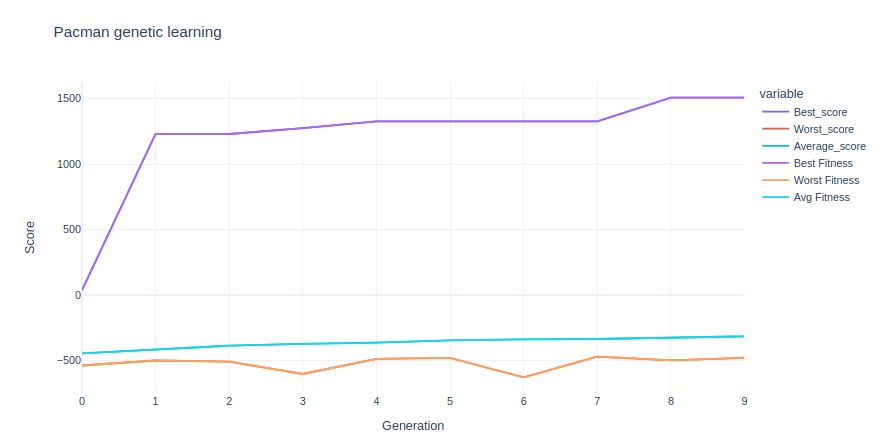

##### - Nº de Vitórias

In [137]:
! python p3.py --numPop 1000 --layout 'smallClassic' --numGen 10 --fitness 'number_of_wins'

In [138]:
results = pd.read_pickle('data.pkl')

In [139]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

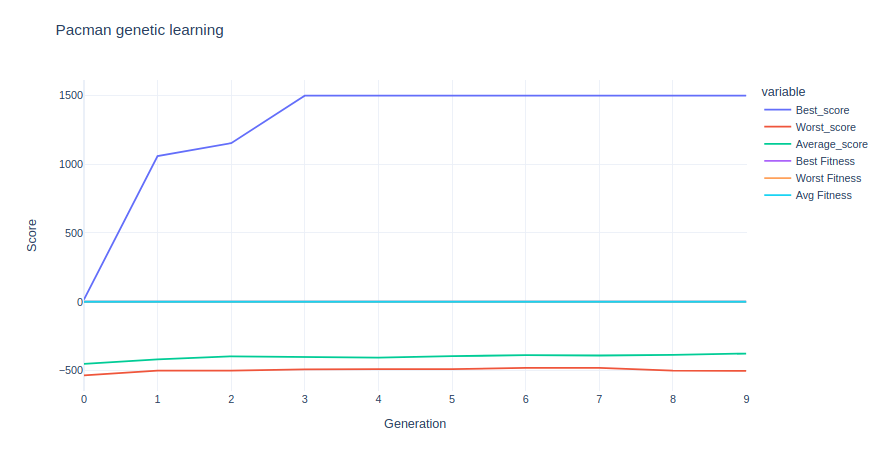

##### - Score Médio / N° de Movimentos

In [140]:
! python p3.py --numPop 1000 --layout 'smallClassic' --numGen 10 --fitness 'average_score_by_movements_length'

In [141]:
results = pd.read_pickle('data.pkl')

In [142]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

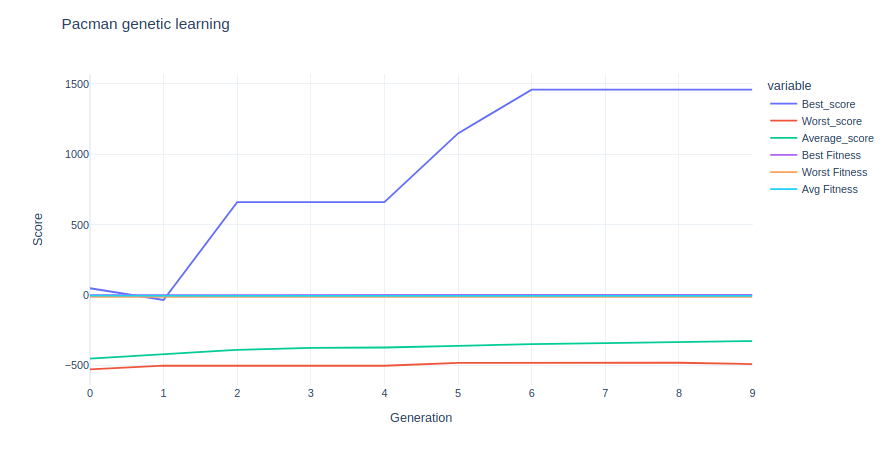

##### -Bonus por comida

In [143]:
! python p3.py --numPop 1000 --layout 'smallClassic' --numGen 10 --fitness 'greedy_bonus'

In [144]:
results = pd.read_pickle('data.pkl')

In [145]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

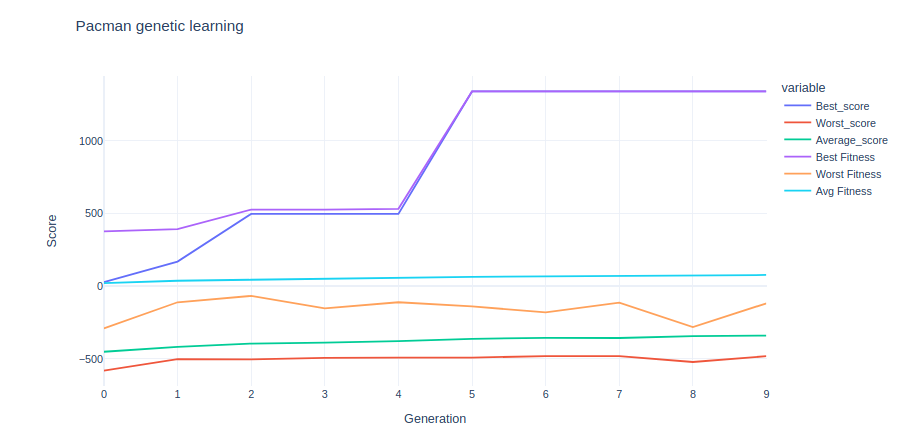

##### -Bonus por vitória

In [146]:
! python p3.py --numPop 1000 --layout 'smallClassic' --numGen 10 --fitness 'wins_bonus_per_score'

In [147]:
results = pd.read_pickle('data.pkl')

In [148]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

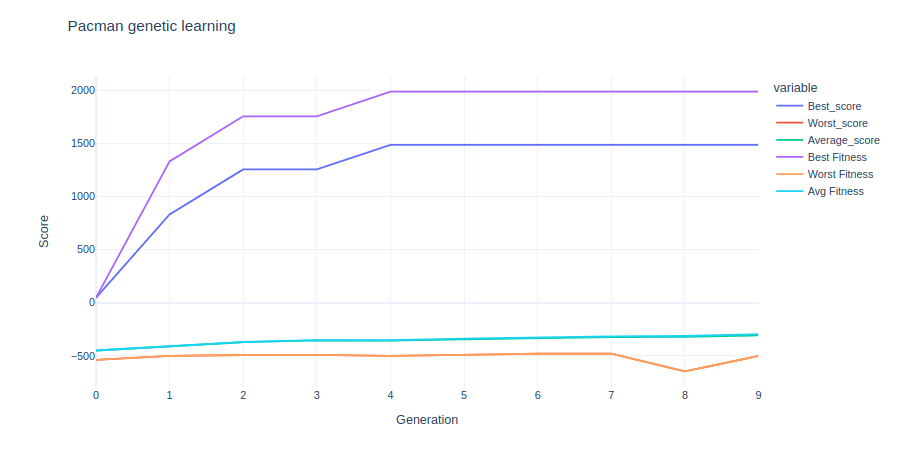

##### -Balanceado

In [149]:
! python p3.py --numPop 1000 --layout 'smallClassic' --numGen 10 --fitness 'balanced'

In [150]:
results = pd.read_pickle('data.pkl')

In [151]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

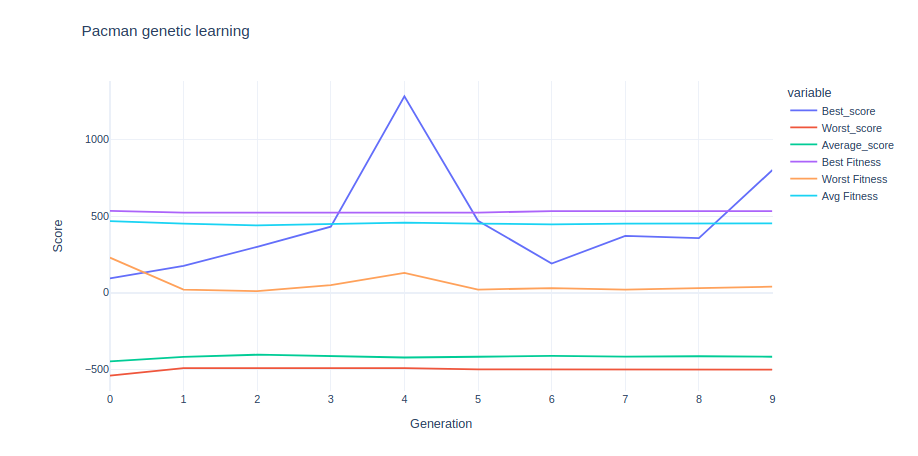

#### Tamanho da População

Vamos avaliar como o nº de indivíduos influencia cada geração e o resultado final após 10 gerações. Por motivos de tempo de execução vamos executar todos os testes no mapa smallClassic, como fitness será utilizada a opção balanceada, este tipo de fitness costuma gerar melhores individuos com mais variação, sendo assim, diminuindo a probabilidade de um maximo local.

##### - 30 Indivíduos por geração

In [152]:
! python p3.py --numPop 30 --layout 'smallClassic' --numGen 10 --fitness 'balanced'

In [153]:
results = pd.read_pickle('data.pkl')

In [154]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

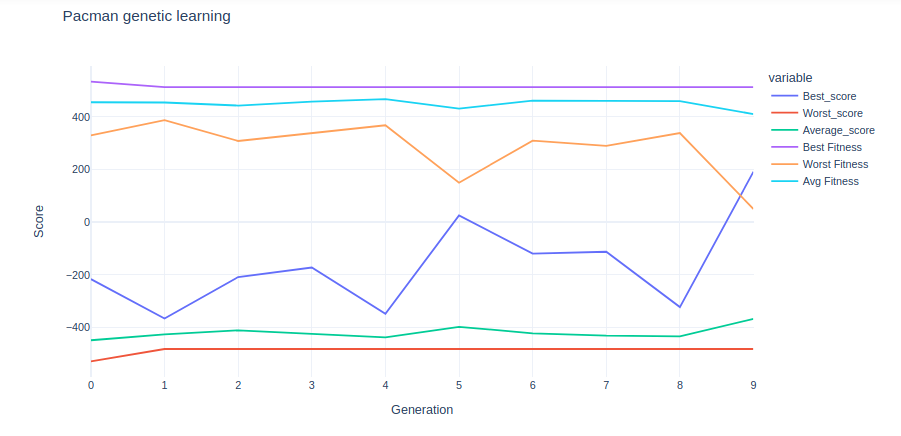

##### - 60 Indivíduos por geração

In [155]:
! python p3.py --numPop 60 --layout 'smallClassic' --numGen 10 --fitness 'balanced'

In [156]:
results = pd.read_pickle('data.pkl')

In [157]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

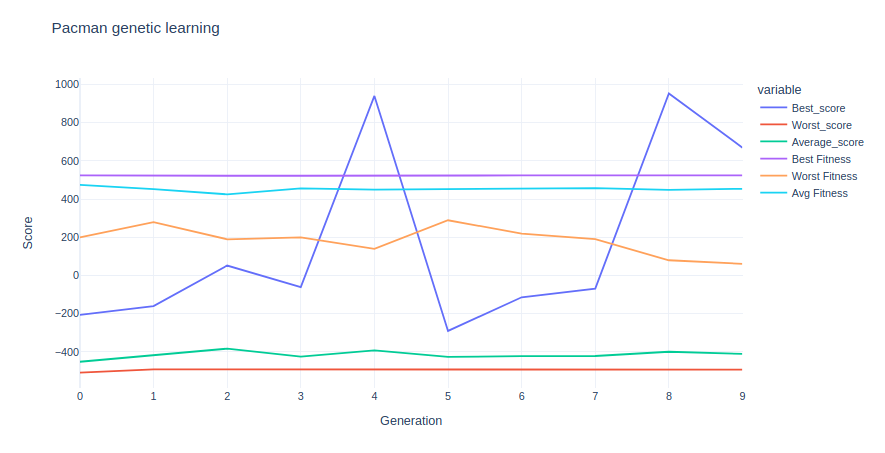

##### - 100 Indivíduos por geração

In [158]:
! python p3.py --numPop 100 --layout 'smallClassic' --numGen 10 --fitness 'balanced'

In [159]:
results = pd.read_pickle('data.pkl')

In [160]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

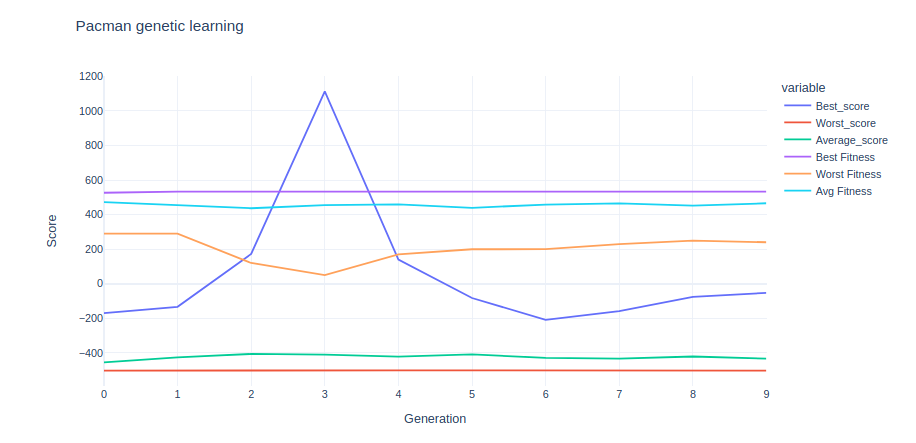

##### - 500 Indivíduos por geração

In [161]:
! python p3.py --numPop 500 --layout 'smallClassic' --numGen 10 --fitness 'balanced'

In [162]:
results = pd.read_pickle('data.pkl')

In [163]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

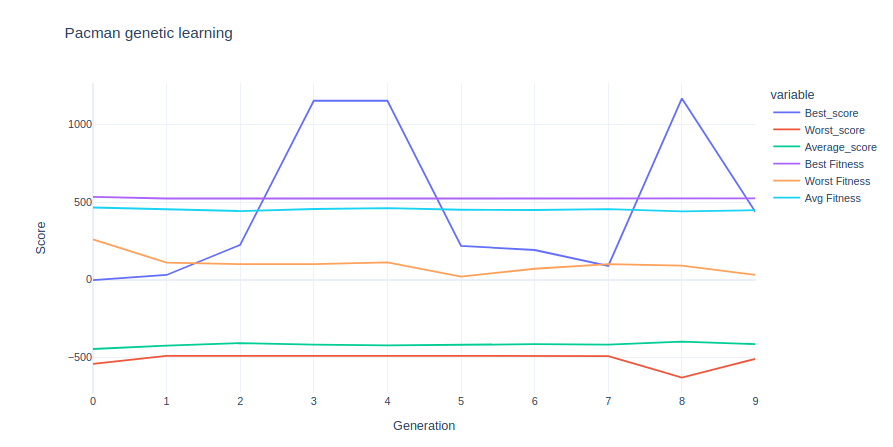

##### - 1000 Indivíduos por geração

In [164]:
! python p3.py --numPop 1000 --layout 'smallClassic' --numGen 10 --fitness 'balanced'

In [165]:
results = pd.read_pickle('data.pkl')

In [166]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

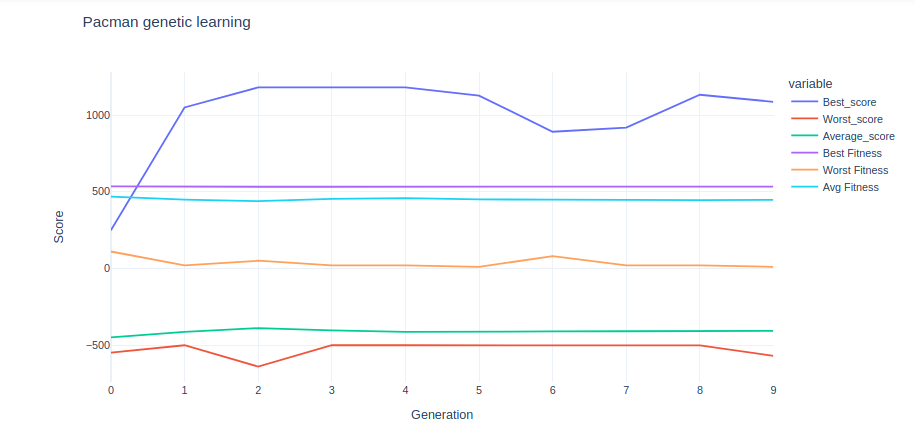

##### - 10000 Indivíduos por geração

In [167]:
! python p3.py --numPop 10000 --layout 'smallClassic' --numGen 10 --fitness 'balanced'

In [168]:
results = pd.read_pickle('data.pkl')

In [169]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

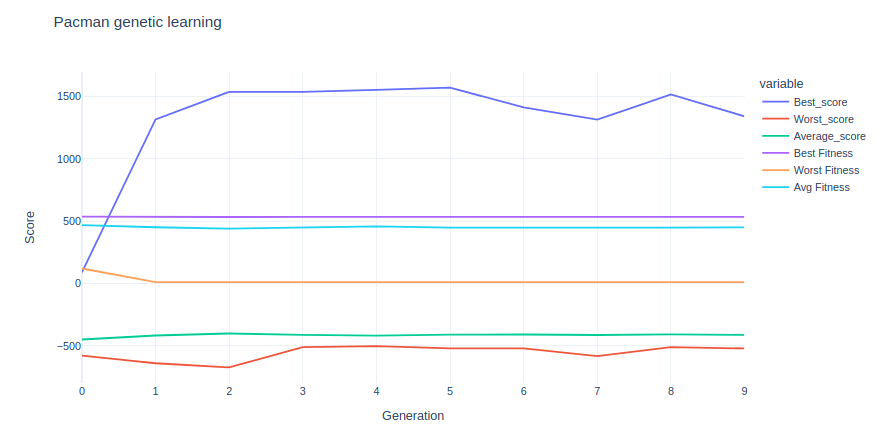

#### Elitismo

A cada geração mantemos os melhores indivíduos inalterados pois queremos que eles continuem sendo avaliados nas próximas gerações, o padrão é 15%. Aqui então variamos a porcentagem de indivíduos que são mantidos pelo menos até a próxima geração para analisar o impacto de manter individuos inalterados nas gerações.

##### - 5% melhores

In [170]:
! python p3.py --numPop 1000 --layout 'smallClassic' --numGen 10 --fitness 'balanced' --mutation 0.05

In [171]:
results = pd.read_pickle('data.pkl')

In [172]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

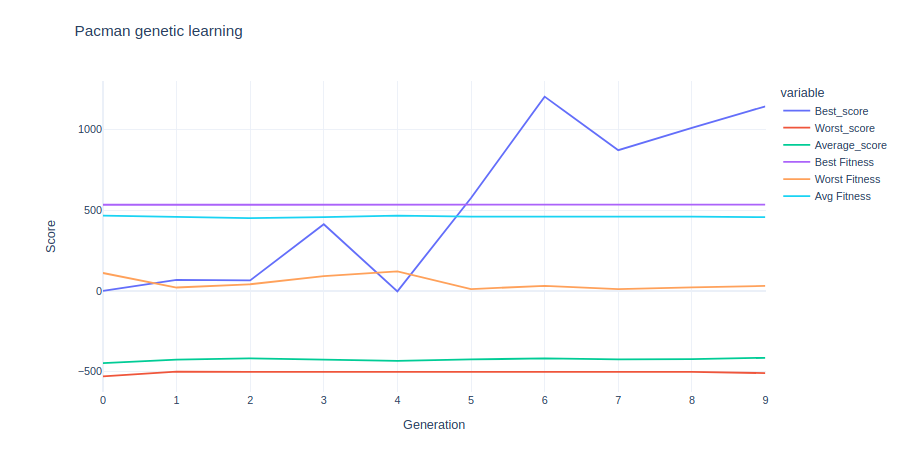

##### - 10% melhores

In [173]:
! python p3.py --numPop 1000 --layout 'smallClassic' --numGen 10 --fitness 'balanced' --mutation 0.1

In [174]:
results = pd.read_pickle('data.pkl')

In [175]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

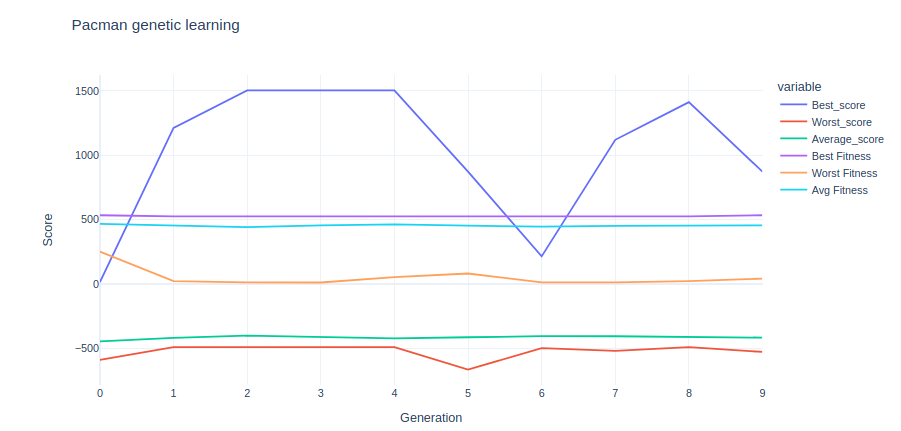

##### - 20% melhores

In [176]:
! python p3.py --numPop 1000 --layout 'smallClassic' --numGen 10 --fitness 'balanced' --mutation 0.2

In [177]:
results = pd.read_pickle('data.pkl')

In [178]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

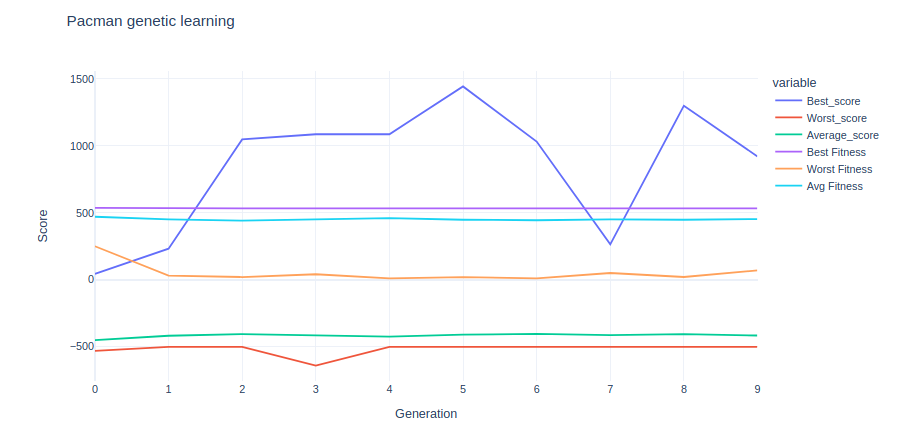

#### Nº de jogos de cada indivíduo e jogos não deterministicos

O projeto base permite que a gente rode N jogos pra um mesmo indivíduo e que a gente obtenha os resultados desses jogos. Portanto esse pode ser considerado um hiperparâmetro já que a priori consegue-se uma consistência maior nos resultados quando se executa mais jogos, nesta etapa vamos setar o jogo para ser não deterministico, pois queremos avaliar como uma sequencia de movimentos é capaz de lhidar com fantasmas gerados aleatóriamente.

##### - 1 jogo

In [179]:
! python p3.py --numPop 1000 --layout 'smallClassic' --numGen 10 --fitness 'balanced' --numGames 1 --deterministic False

In [180]:
results = pd.read_pickle('data.pkl')

In [181]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

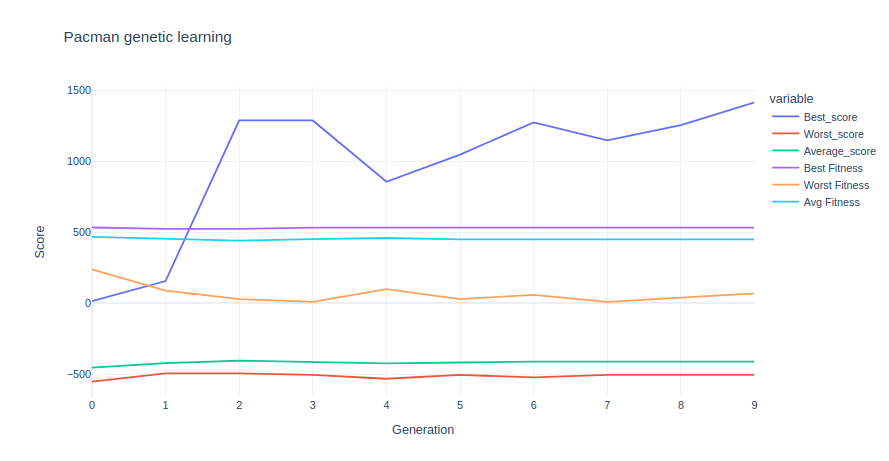

##### - 3 jogos

In [182]:
! python p3.py --numPop 1000 --layout 'smallClassic' --numGen 10 --fitness 'balanced' --numGames 3 --deterministic False

In [183]:
results = pd.read_pickle('data.pkl')

In [184]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

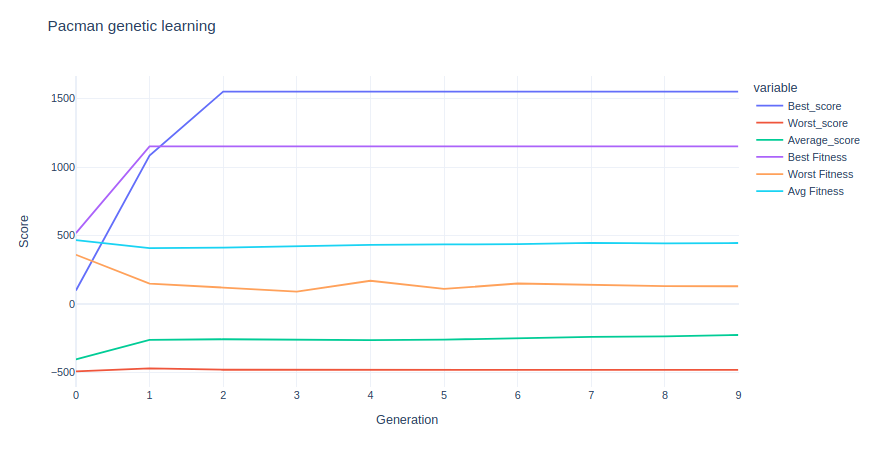

##### - 5 jogos

In [185]:
! python p3.py --numPop 1000 --layout 'smallClassic' --numGen 10 --fitness 'balanced' --numGames 5 --deterministic False

In [186]:
results = pd.read_pickle('data.pkl')

In [187]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

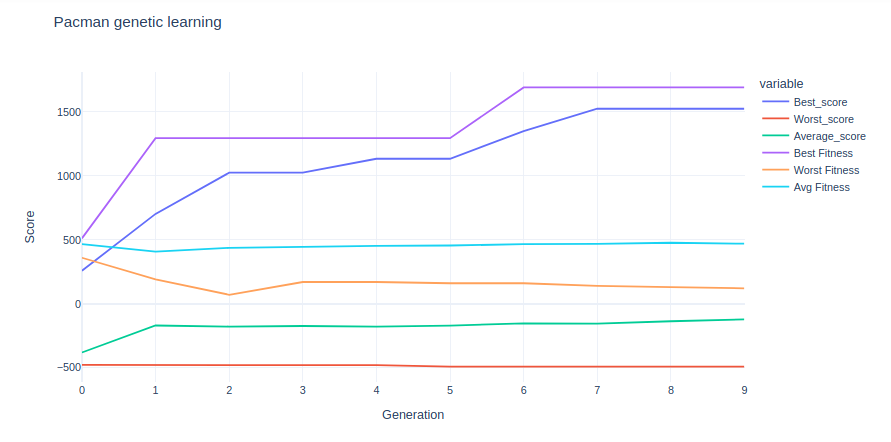

#### Diferentes numeros de geração

Testaremos a variação dos scores do pacman depois de muitas gerações com o fitness "balanceado".

##### - 50 gerações

In [188]:
! python p3.py --numPop 1000 --layout 'smallClassic' --numGen 50 --fitness 'balanced'

In [189]:
results = pd.read_pickle('data.pkl')

In [190]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

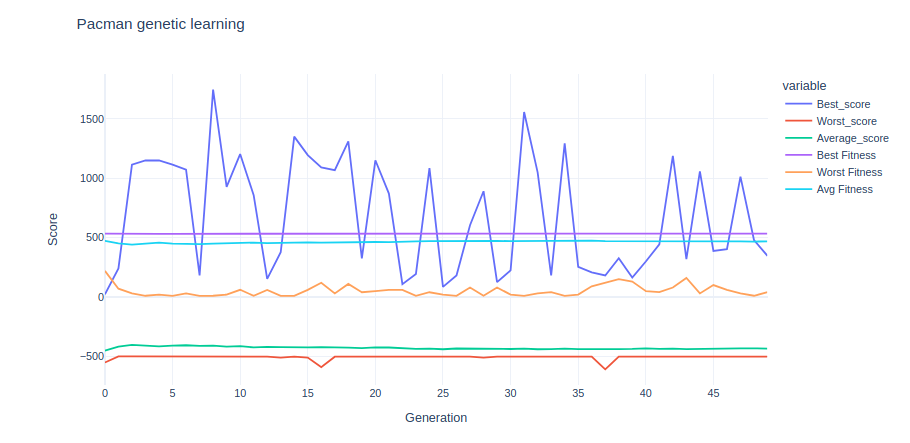

#### Diferentes layouts

Testaremos a capacidade do pacman de vencer os diferentes layouts em jogos não deterministicos.

##### - smallClassic

In [191]:
! python p3.py --numPop 200 --layout 'smallClassic' --numGen 30 --fitness 'wins_bonus_per_score' --numGames 3 --deterministic False

In [192]:
results = pd.read_pickle('data.pkl')

In [193]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

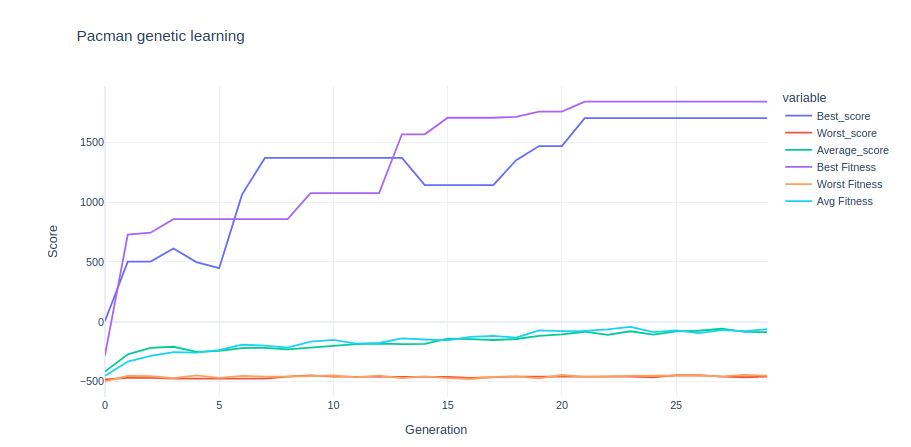

##### - mediumClassic

In [200]:
! python p3.py --numPop 200 --layout 'mediumClassic' --numGen 30 --fitness 'wins_bonus_per_score' --numGames 3 --deterministic False

In [201]:
results = pd.read_pickle('data.pkl')

In [202]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

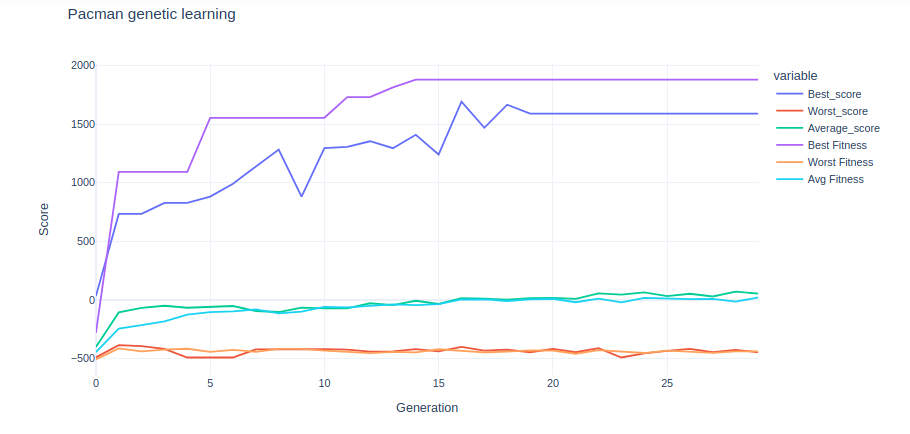

##### - originalClassic

In [197]:
! python p3.py --numPop 200 --layout 'originalClassic' --numGen 30 --fitness 'wins_bonus_per_score' --numGames 3 --deterministic False

In [198]:
results = pd.read_pickle('data.pkl')

In [199]:
fig = px.line(results, x='Generation', y=['Best_score', 'Worst_score', 'Average_score', 'Best Fitness', 'Worst Fitness', 'Avg Fitness'], title='Pacman genetic learning',
                  labels=dict(value = 'Score'), template='plotly_white')
fig.show()

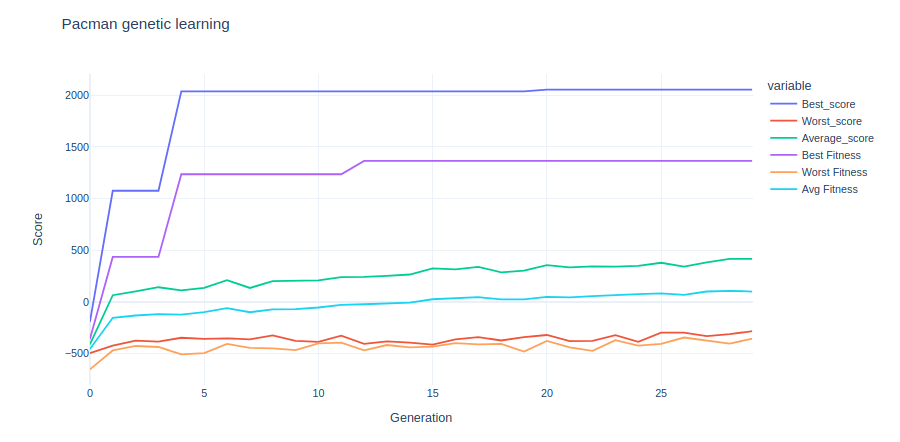

### Análise

Como observado, a função de fitness é a principal responsavel por criar individuos capacitados ao longo das gerações, para cada tipo de fitness o pacman se adapta de forma diferente, sendo o modo balanceado o que gera mais individuos diversificados, como podemos ver na analise das 50 gerações, enquanto os outros fitness consideram poucos parametros para calcular o fitness, o modo balanceado leva em consideração varias ações durante o jogo, nos outros tipos a população converge para um ótimo que pode não ser um ótimo global e dificilmente aparecerá um individuo melhor, enquanto o modo balanceado gera individuos capazes de conseguir um fitness mais alto de formas diferentes, sendo assim, a população é mais diversificada e a probilidade de aparecer um individuo que é um ótimo global aumenta consideravelmente, porém os parametros que foram setados nesse fitness podem não estar refinados o suficiente para isso, é necessario que o peso de cada ação seja bem balanceado para que o melhor individuo apareça com o minimo de gerações possiveis.

O numero de individuos também influencia bastante no aparecimento de um individuo que seja bem capacitado, como podemos ver nos gráficos, quanto maior a população, mais rapido aparece o melhor individuo com capacidade de atingir scores maiores, isso acontece pois a probabilidade de alguma mutação/crossover gerar um individuo mais capacitado aumenta proporcionalmente com o aumento da população.

Quanto ao elitismo, variar a taxa de individuos que permanecem após varias gerações não influenciou muito na evolução dos pacmans, talvez com taxas maiores que as que usamos possa atrapalhar um pouco devido ao fato de que manter muitos individuos de elite entre as gerações tende a gerar ótimos locais, porém com o modo balanceado isso não chegou a ser um problema em nossos testes.

Quanto ao numero de jogos e o jogo ser não deterministico, é perceptivel que 1 jogo e 5 jogos demoraram mais para convergir, isso pode ser explicado pelo fator probabilistico, com poucos jogos a probilidade de acontecer um bom jogo com os movimentos fixos é bem baixa, enquanto com 5 jogos os individuos podem ter o azar de perder grande parte dos jogos e não ser bem classificado, no geral 3 jogos é o suficiente para avaliar o desempenho dos individuos e criar individuos capacitados. E isso se confirma na analise dos diferentes mapas, 3 jogos foram o suficiente para gerar individuos que são capazes de manter altos scores ao longo das gerações. Nesta analise optamos por utilizar o fitness de bonus por vitória, este fitness é capaz de gerar individuos que buscam comer todas as comidas para vencer o jogo, como no modo não deterministico os fantasmas podem estar em posições aleatórias, os pacmans de outros tipos de fitness podem fazer movimentos buscando consumir fantasmas com medo para aumentar seu score e isso pode diminuir sua chance de vitória visto que o fantasma pode não estar mais lá quando os movimentos forem reproduzidos na próxima geração, como no fitness bônus por vitória a recompensa é maior por cada vitória, os individuos tendem a ser mais rapidos para finalizar o jogo diminuindo consideravelmente a probabilidade de morrer.

Observações: o numero de individuos da população e de gerações foi alterado conforme a necesidade durante os testes para que o tempo de computação não fosse muito alto e pudessemos maximizar a quantidade de testes, conseguimos resultados satisfatórios, porém devido a essas limitações não foi possivel encontrar o maximo global para todos os mapas.

## Parte 2 - Aprendizado por Reforço

Nesta parte nos preocupamos em implementar os principais conceitos relacionados ao **Aprendizado por Reforço**. Neste paradigma treinamos o agente por várias épocas determinando a melhor decisão de acordo com as recompensas obtidas ao longo do processo de exploração. Também nos basearemos nos mesmos 3 layouts usados na Parte 1: `smallClassic`, `mediumClassic` e `originalClassic`.

### Implementações

In [1]:
import matplotlib.pyplot as plt
import ast

def plotResults(performance):
    fig, axs = plt.subplots(3, figsize=(15,15))
    axs[0].set_title('Rewards')
    axs[0].set_xlabel('Épocas')
    axs[0].set_xscale('log')
    axs[0].set_ylabel('Reward')
    axs[0].plot(ast.literal_eval(performance[0])['rewards'], 'g')

    axs[1].set_title('Actions')
    axs[1].set_xlabel('Épocas')
    axs[1].set_xscale('log')
    axs[1].set_ylabel('Ações')
    axs[1].plot(ast.literal_eval(performance[0])['actions'], 'y')

    axs[2].set_title('Score')
    axs[2].set_xlabel('Épocas')
    axs[2].set_xscale('log')
    axs[2].set_ylabel('Score')
    axs[2].plot(ast.literal_eval(performance[0])['scores'])

### Desenvolvimento

Para esta parte, decidimos por implementar o **Q-Learning**, um algoritmo bastante utilizado na área de Aprendizado por Reforço. A principal ideia é que salvamos as melhores decisões das muitas posições percorridas pelo agente na fase de exploração. Após o treino, o agente consultará a tabela a cada posição para escolher a melhor direção naquele momento. Aqui entendemos por melhor direção o movimento que fará com que ele obtenha um melhor score.

O agente utilizado no algoritmo está implementado no arquivo `qLearningAgents.py`. Ele basicamente possui uma função `getAction` (padrão do projeto base) que insere ou atualiza o valor da ação. Este cálculo é obtido a partir da equação de Bellman (`bellman_equation()`). E há também uma função `final()` (também padrão do projeto base) que é chamada ao final de cada jogo e que reseta os parâmetros iniciais e faz com que o agente rode num modo menos aleatório e que consulte mais os valores da tabela obtidos na fase de exploração.

É importante citar que no Q-Learning existem alguns hiperparâmetros importantes para a análise do modelo. Estes são: **alpha**, **epsilon** e **gamma**. O alpha (learning rate) se refere ao quanto o agente aceita novos valores ao invés dos valores já armazenados. Já o epsilon determina o quanto o agente deve explorar ou consultar valores da tabela. E por fim, o gamma está relacionado a quanto o agente deve se preocupar na recompensa a longo prazo. No nosso caso, variamos os valores de alpha e epsilon para análise e mantivemos o valor do gamma fixo em 0.5. Para as análises iniciais, consideramos um valor padrão para os hiperparâmetros alpha (0.8), epsilon (0.8) e gamma (0.5). A cada 1000 episódios, é descontado 0.1 do valor de alpha e epsilon, sendo 0.3 os seus valores mínimos.

Um outro hiperparâmetro importante é o n° de épocas que o agente usa pra treinar, isto é, para focar mais em explorar o ambiente e preencher a tabela de posições e ações. Portanto, também faremos uma análise de como esse hiperparâmetro influencia o resultado final. Por padrão, toda execução roda **n + 10 épocas**, em que **n** é o parâmetro passado e 10 é o número de jogos que o PacMan joga no modo de `exploitation`. Estes 10 últimos jogos serão úteis depois pra podermos comparar os resultados entre os modelos de aprendizado por reforço e programação genética.

Em relação à **formulação** do problema, os estados são as posições _(x,y)_ do agente num determinado instante de tempo e para um determinado layout. As **ações** são os movimentos feitos nas direções: `North`, `East`, `South` e `West` e a **função de recompensa** (reward) é dada pela diferença de pontuação entre o estado atual (depois da ação) e o estado anterior.

##### - 2000 épocas

In [2]:
# smallClassic
performance_2000_small = ! python reinforcement.py --numGames 2000 --layout smallClassic

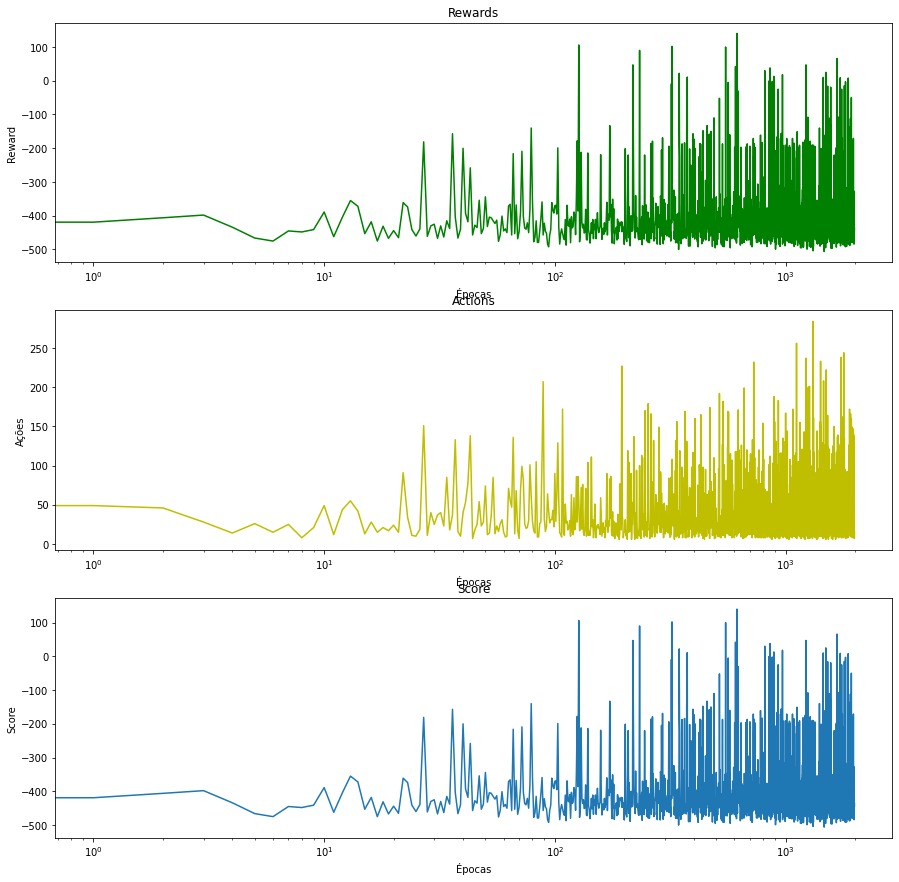

In [3]:
plotResults(performance_2000_small)

In [4]:
# mediumClassic
performance_2000_medium = ! python reinforcement.py --numGames 2000 --layout mediumClassic

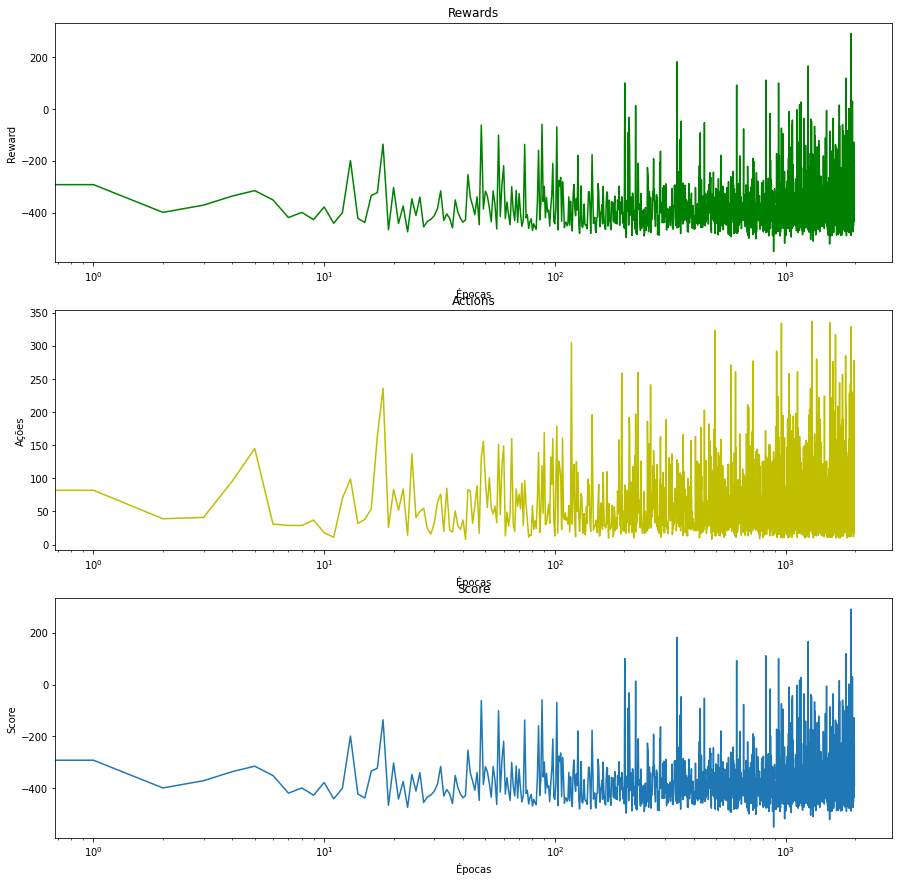

In [5]:
plotResults(performance_2000_medium)

In [6]:
# originalClassic
performance_2000_original = ! python reinforcement.py --numGames 2000 --layout originalClassic

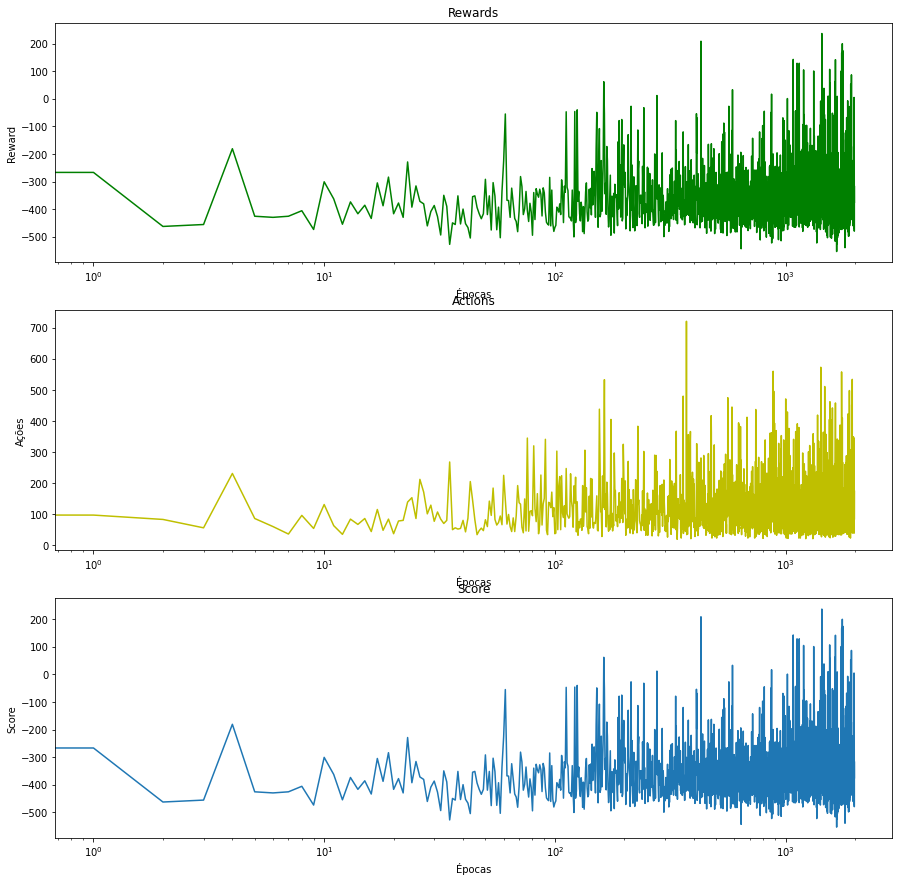

In [7]:
plotResults(performance_2000_original)

<BarContainer object of 3 artists>

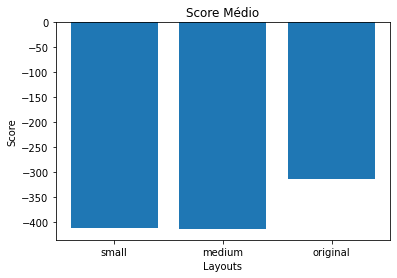

In [8]:
# score médio
import matplotlib.pyplot as plt

data = {'small': ast.literal_eval(performance_2000_small[-1])['score'], 'medium': ast.literal_eval(performance_2000_medium[-1])['score'], 'original': ast.literal_eval(performance_2000_original[-1])['score']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Score Médio')
fig.set_xlabel('Layouts')
fig.set_ylabel('Score')
fig.bar(names, values)

<BarContainer object of 3 artists>

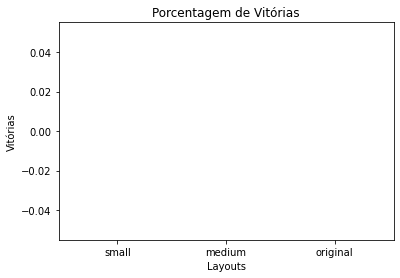

In [9]:
# porcentagem de vitórias
data = {'small': ast.literal_eval(performance_2000_small[-1])['win_percentage'], 'medium': ast.literal_eval(performance_2000_medium[-1])['win_percentage'], 'original': ast.literal_eval(performance_2000_original[-1])['win_percentage']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Porcentagem de Vitórias')
fig.set_xlabel('Layouts')
fig.set_ylabel('Vitórias')
fig.bar(names, values)

##### - 4000 épocas

In [10]:
# smallClassic
performance_4000_small = ! python reinforcement.py --numGames 4000 --layout smallClassic

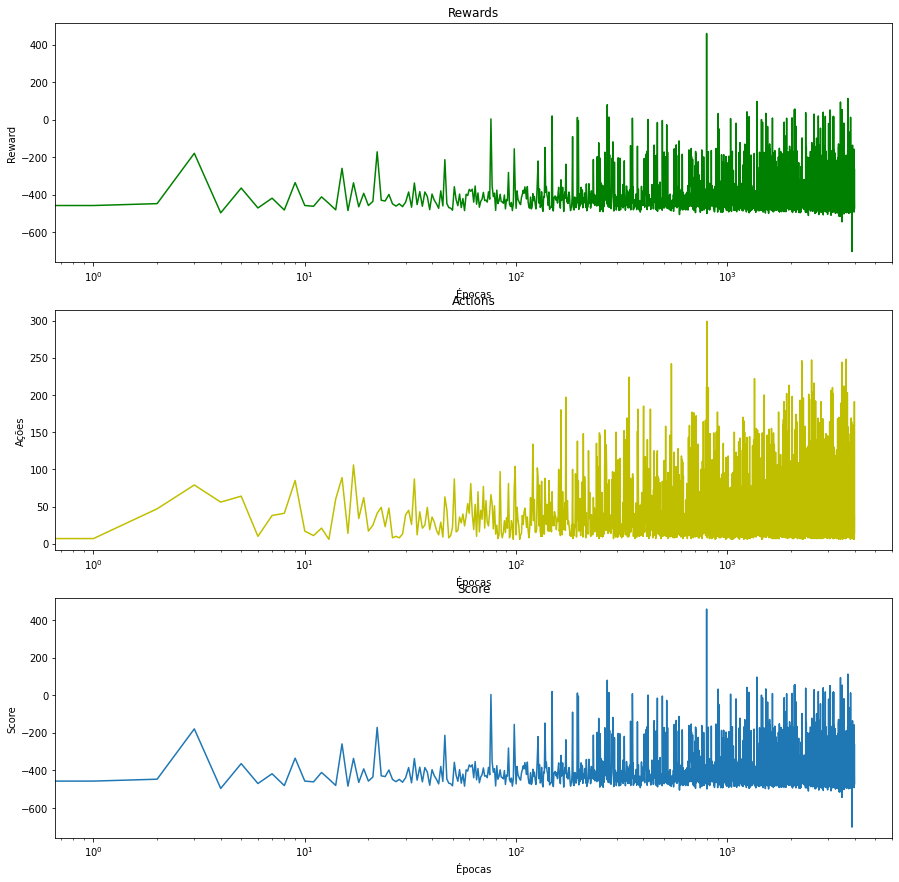

In [11]:
plotResults(performance_4000_small)

In [12]:
# mediumClassic
performance_4000_medium = ! python reinforcement.py --numGames 4000 --layout mediumClassic

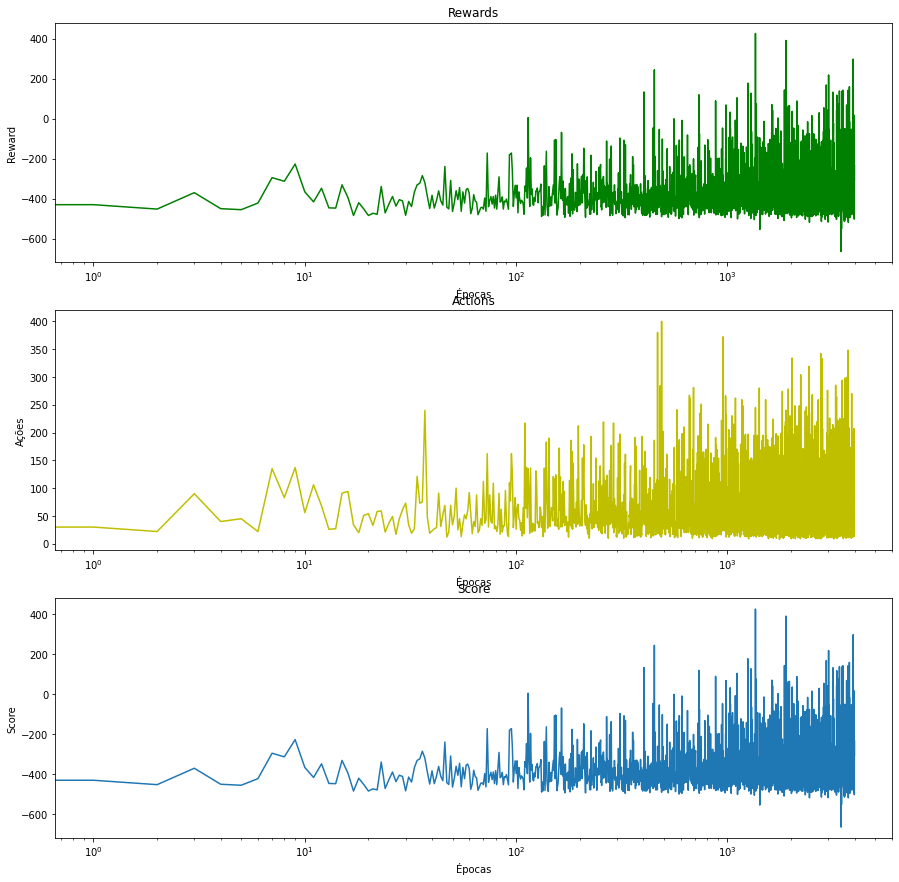

In [13]:
plotResults(performance_4000_medium)

In [14]:
# originalClassic
performance_4000_original = ! python reinforcement.py --numGames 4000 --layout originalClassic

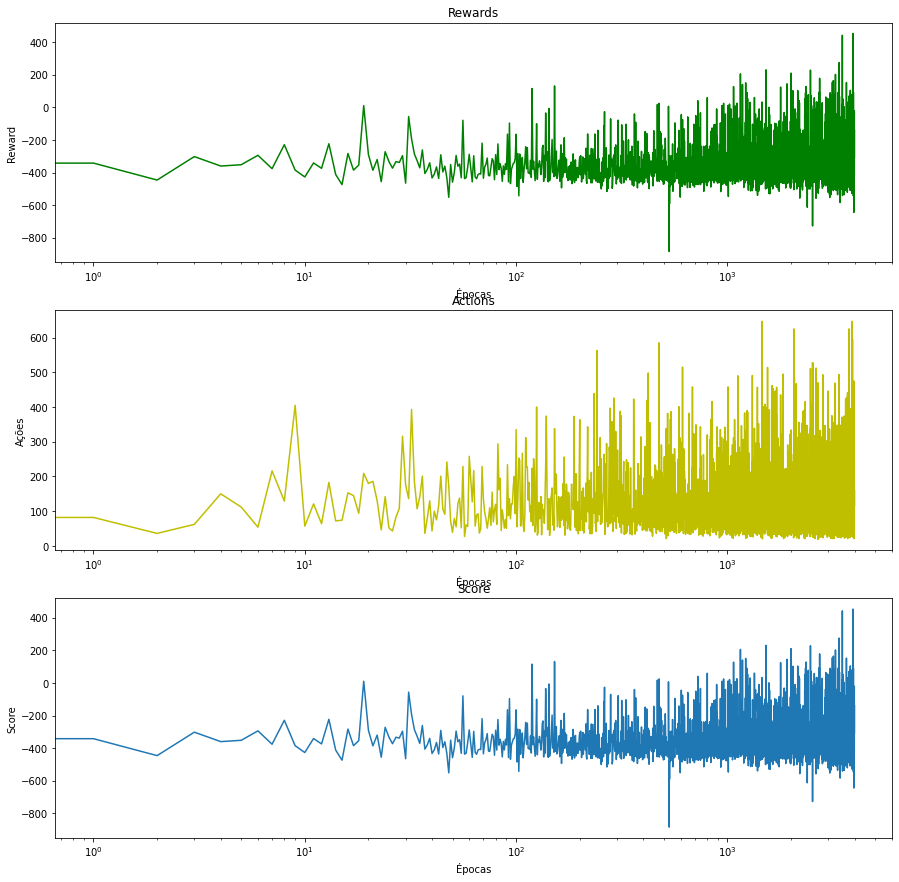

In [15]:
plotResults(performance_4000_original)

<BarContainer object of 3 artists>

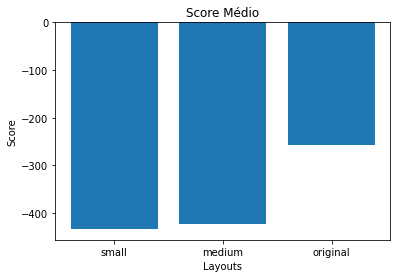

In [16]:
import matplotlib.pyplot as plt

# score médio
data = {'small': ast.literal_eval(performance_4000_small[-1])['score'], 'medium': ast.literal_eval(performance_4000_medium[-1])['score'], 'original': ast.literal_eval(performance_4000_original[-1])['score']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Score Médio')
fig.set_xlabel('Layouts')
fig.set_ylabel('Score')
fig.bar(names, values)

<BarContainer object of 3 artists>

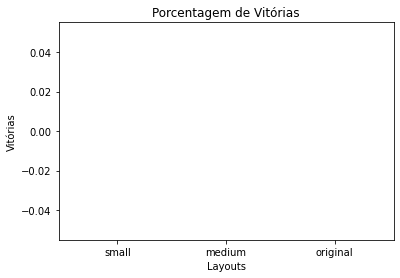

In [17]:
# porcentagem de vitórias
data = {'small': ast.literal_eval(performance_4000_small[-1])['win_percentage'], 'medium': ast.literal_eval(performance_4000_medium[-1])['win_percentage'], 'original': ast.literal_eval(performance_4000_original[-1])['win_percentage']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Porcentagem de Vitórias')
fig.set_xlabel('Layouts')
fig.set_ylabel('Vitórias')
fig.bar(names, values)

##### - 6000 épocas

In [18]:
# smallClassic
performance_6000_small = ! python reinforcement.py --numGames 6000 --layout smallClassic

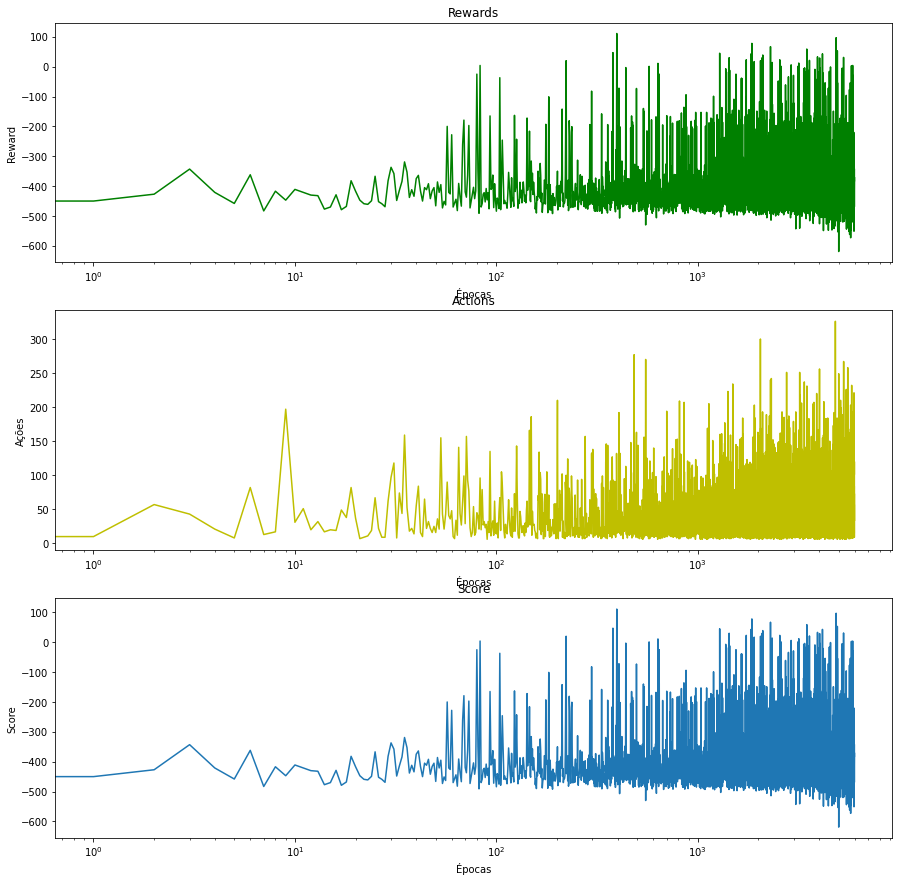

In [19]:
plotResults(performance_6000_small)

In [20]:
# mediumClassic
performance_6000_medium = ! python reinforcement.py --numGames 6000 --layout mediumClassic

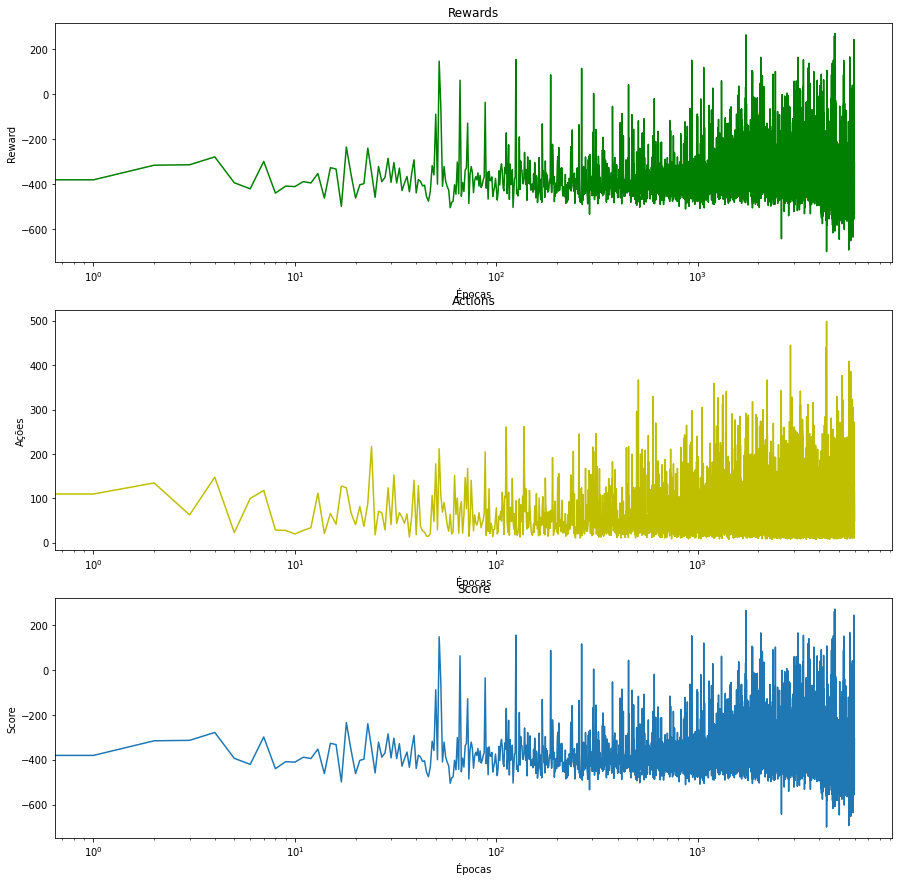

In [21]:
plotResults(performance_6000_medium)

In [22]:
# originalClassic
performance_6000_original = ! python reinforcement.py --numGames 6000 --layout originalClassic

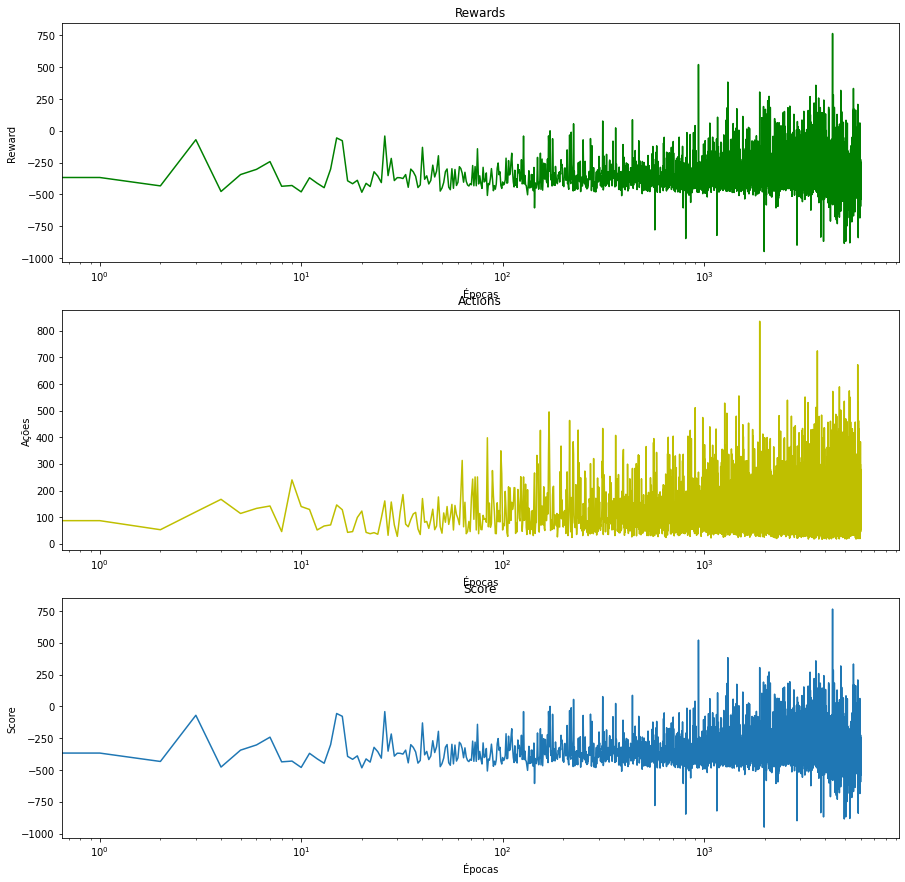

In [23]:
plotResults(performance_6000_original)

<BarContainer object of 3 artists>

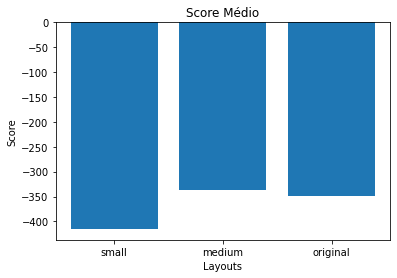

In [24]:
import matplotlib.pyplot as plt

# score médio
data = {'small': ast.literal_eval(performance_6000_small[-1])['score'], 'medium': ast.literal_eval(performance_6000_medium[-1])['score'], 'original': ast.literal_eval(performance_6000_original[-1])['score']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Score Médio')
fig.set_xlabel('Layouts')
fig.set_ylabel('Score')
fig.bar(names, values)

<BarContainer object of 3 artists>

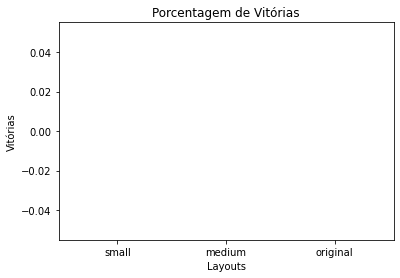

In [25]:
# porcentagem de vitórias
data = {'small': ast.literal_eval(performance_6000_small[-1])['win_percentage'], 'medium': ast.literal_eval(performance_6000_medium[-1])['win_percentage'], 'original': ast.literal_eval(performance_6000_original[-1])['win_percentage']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Porcentagem de Vitórias')
fig.set_xlabel('Layouts')
fig.set_ylabel('Vitórias')
fig.bar(names, values)

#### Learning Rate e Exploration Rate

#####  Alpha = Epsilon = 1

In [26]:
performance_10 = ! python reinforcement.py --numGames 4000 --learningRate 1 --explorationRate 1 --layout mediumClassic

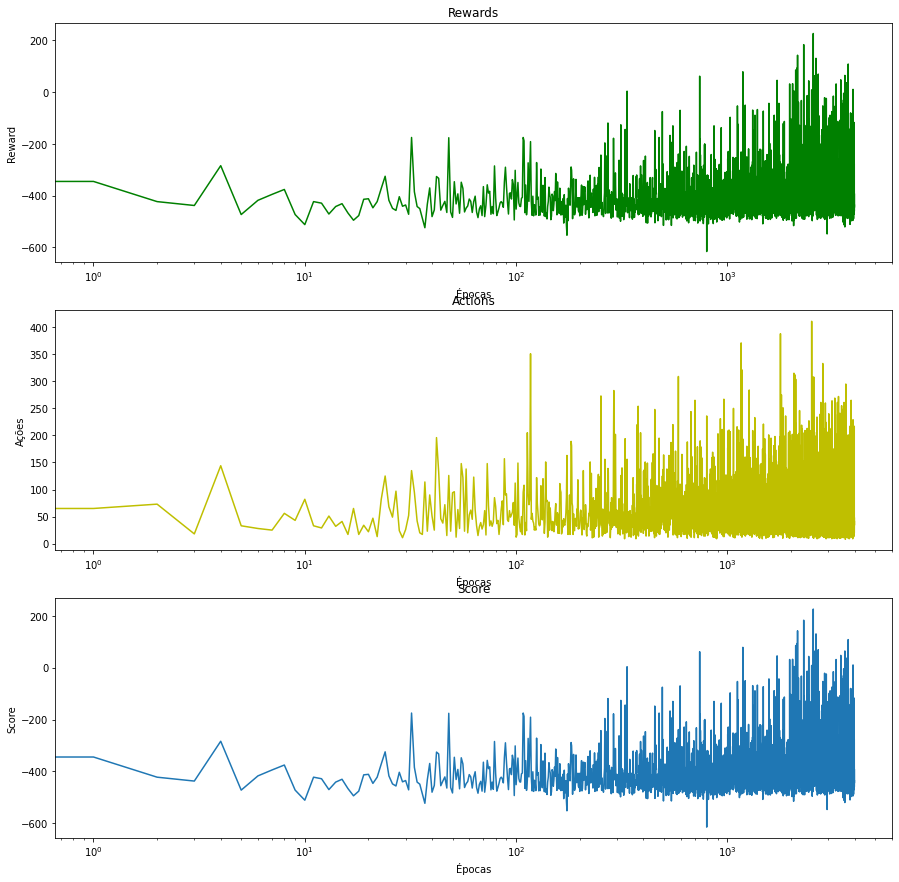

In [27]:
plotResults(performance_10)

#####  Alpha = Epsilon = 0.8

In [28]:
performance_08 = ! python reinforcement.py --numGames 4000 --learningRate 0.8 --explorationRate 0.8 --layout mediumClassic

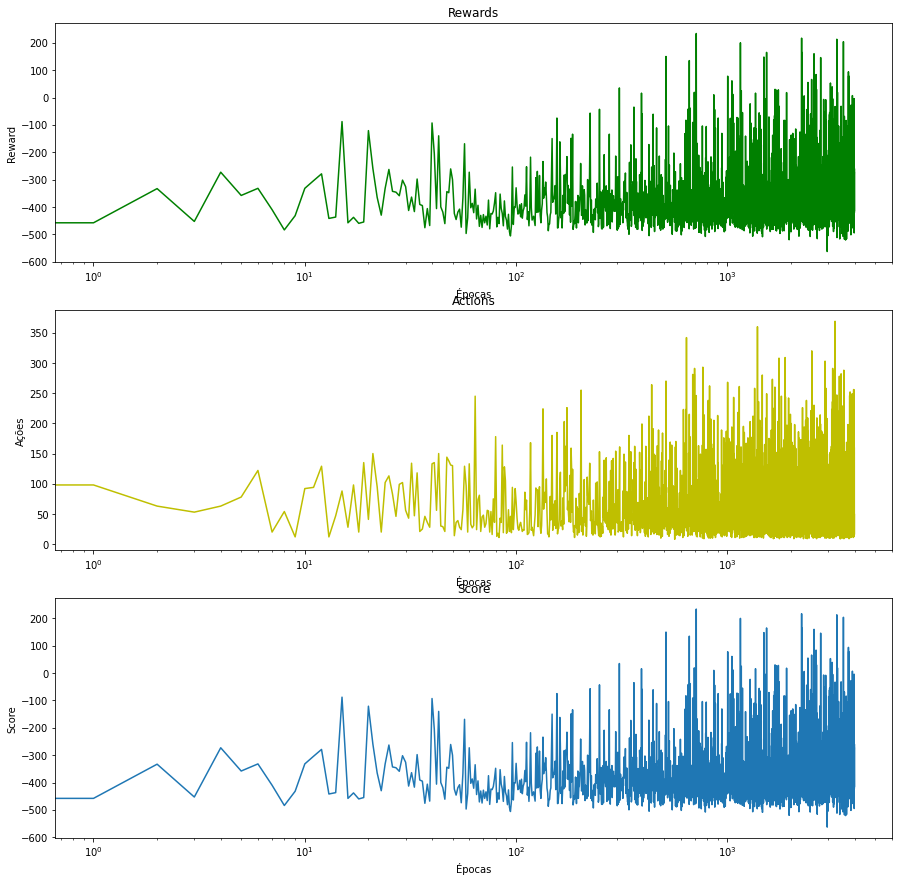

In [29]:
plotResults(performance_08)

#####  Alpha = Epsilon = 0.6

In [30]:
performance_06 = ! python reinforcement.py --numGames 4000 --learningRate 0.6 --explorationRate 0.6 --layout mediumClassic

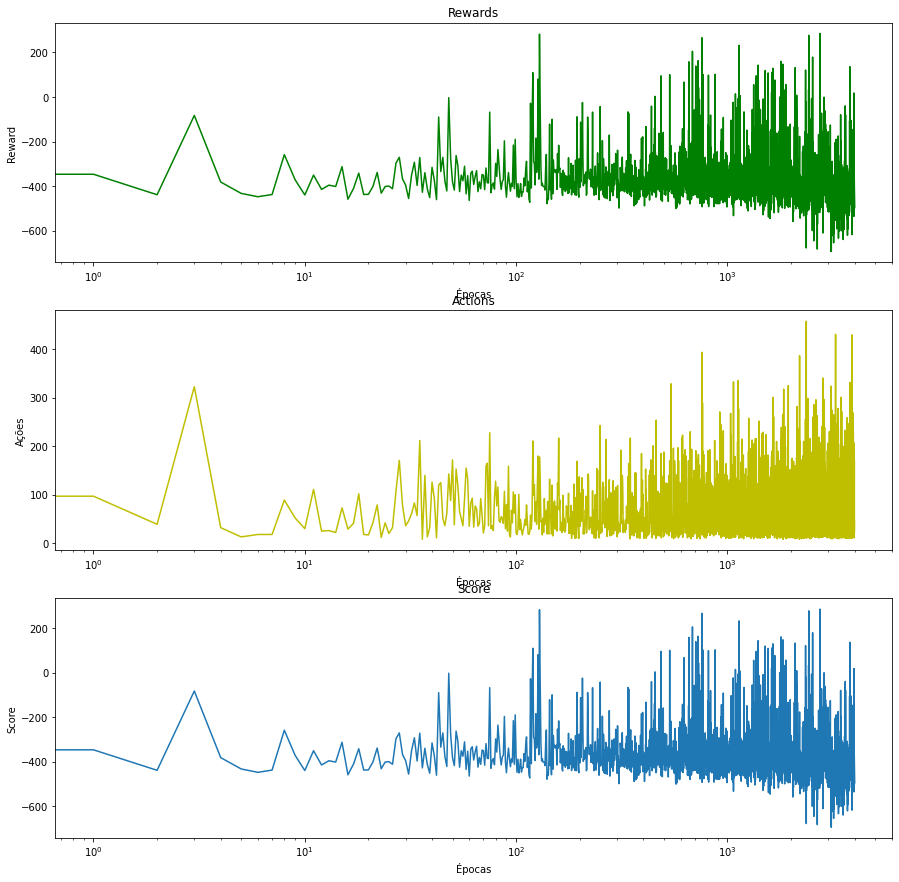

In [31]:
plotResults(performance_06)

<BarContainer object of 3 artists>

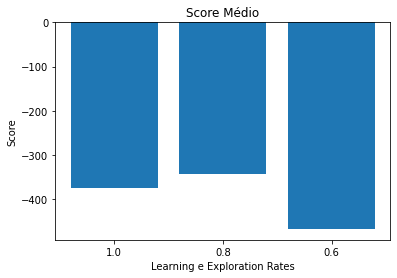

In [32]:
import ast
import matplotlib.pyplot as plt

# score médio
data = {'1.0': ast.literal_eval(performance_10[-1])['score'], '0.8': ast.literal_eval(performance_08[-1])['score'], '0.6': ast.literal_eval(performance_06[-1])['score']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Score Médio')
fig.set_xlabel('Learning e Exploration Rates')
fig.set_ylabel('Score')
fig.bar(names, values)

<BarContainer object of 3 artists>

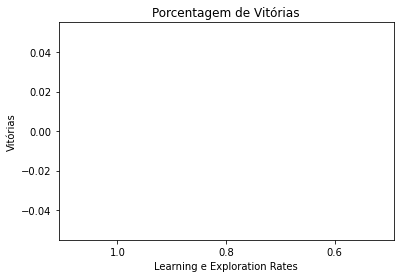

In [33]:
# porcentagem de vitórias
data = {'1.0': ast.literal_eval(performance_10[-1])['win_percentage'], '0.8': ast.literal_eval(performance_08[-1])['win_percentage'], '0.6': ast.literal_eval(performance_06[-1])['win_percentage']}
names = list(data.keys())
values = list(data.values())

fig = plt.subplot()
fig.set_title('Porcentagem de Vitórias')
fig.set_xlabel('Learning e Exploration Rates')
fig.set_ylabel('Vitórias')
fig.bar(names, values)

### Análise

Em relação ao número de épocas, podemos notar que em todas as situações há uma melhora na performance do agente, tanto em score e recompensa quanto no n° de ações. E apesar de não termos conseguido nenhum vitória com o modelo de aprendizado por reforço, há também uma melhora na frequência de jogos com score positivo, o que pode indicar uma tendência de melhora de performance adicionando-se mais épocas ao modelo.

Apesar disso, se focarmos apenas no layout `smallClassic`, percebemos que o score médio praticamente não se alterou conforme se aumentou o n° de épocas. Isso pode significar uma limitação do modelo, já que a tendência era que o agente se comportasse melhor no mesmo mapa mas com mais épocas sendo executadas e portanto um treinamento mais robusto. Voltaremos nesse tópico em breve.
Já no layout `mediumClassic` podemos ver uma discreta melhora do score médio com o aumento do n° de épocas. E por fim, no layout `originalClassic` vemos uma melhora razoável de 2000 pra 4000 épocas, porém o modelo foi pior que estes 2 executando-se 6000 épocas. Isso também pode significar uma limitação do modelo, semelhante ao que ocorreu no primeiro layout.

Quando nos referimos às limitações do modelo, estamos nos preocupando com o contexto do jogo e como o agente (PacMan) está ciente deste contexto. No nosso modelo o agente só consegue saber a sua posição e se o seu último movimento fez seu score aumentar ou não. Como forma de complementar e aprimorar nesse aspecto, pensamos que se o agente tivesse por exemplo ciência das posições dos fantasmas e das distâncias destes e de cápsulas que aumentam o score talvez isso pudesse influenciar a forma como ele recebesse recompensas e portanto a forma como ele se comporta dentro do jogo. E nisso também podemos incluir a função de recompensa, que no nosso modelo considera apenas a diferença de score entre a posição anterior e a atual. Como o jogo diminui o score com o tempo, é provável que um refinamento dessa função, até considerando os aspectos de contexto citados anteriormente, pudesse obter uma melhor performance pro modelo.

Em relação aos hiperparâmetros alpha e epsilon, podemos ver que para o layout `mediumClassic` e executando-se 4000 épocas, os valores mais adequados também foram valores médio: 0.8. Portanto pela nossa experiência, valores médios pra altos de alpha e epsilon tiveram uma performance melhor, o que faz sentido nesse caso pois como há muitas posições possíveis para o agente, deve-se estimular a exploração do ambiente. Mas entendemos, claro, que isso deve ser dosado e equilibrado de acordo com o layout e n° de épocas.

### Programação Genética vs Aprendizado por Reforço

### Contribuição de cada membro do time

Erik:

    -Criação do modelo evolucionario

    -Aprimoramentos no código de modelo evolucionario

    -Analises do modelo evolucionario

Victor:

    -Criação e estruturação do código do jogo e dos agents

    -Criação e implementação do modelo de Reinforcement Learn

    -Analise do modelo de RL

    -Analise final


